In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
from numpy import savetxt
import xarray as xr
import os
import scipy
import pandas as pd
import matplotlib.colors
from matplotlib import cm
import netCDF4
from netCDF4 import Dataset

<h1>Goal for the day: <br/>Use loops and if statements to manipulate a 10-minutely dataset to give hourly outputs!

Reminder:
<br/><font color='blue'>* Blue text indicates activities that you should complete as a student
<br/><font color='red'>* Red text indicates extra challenge questions

<h2> 1. Intro to 'if' statements

In [2]:
#Example of using 'if' statements
a=33
b=33

if b==a:
    print('b equals a')

b equals a


<font color='blue'>Edit the following code to make it print 'a is greater than b'

In [4]:
#Example of using 'if' statements
a=34
b=33

if b<a:
    print('a is greater than b')

a is greater than b


<font color='blue'> List all the things you notice must be included in the if statement structure

1. if condition
<br/>2. colon after if statement
<br/>3. enter and indentation for 'thing we want done'

There are a whole bunch of logic statements we can use to write an if statement
* equals a == b
* not equals a != b
* less than a < b
* less than or equal to a <= b
* same two above for greater than
* more options [at this link](https://www.geeksforgeeks.org/python-logical-operators-with-examples-improvement-needed/)

<font color='blue'> Spend 3 minutes writing your own unique if statement using at least two of the following variables

In [ ]:
a=29
b=90
c=29








<h2> 2. Intro to for loops 

In [7]:
import numpy as np

#Make a numpy array of values
a=np.array(['apple','orange','pear','watermelon','grapes'])

for i in a:
    print('The value in this spot is '+str(i))

The value in this spot is apple
The value in this spot is orange
The value in this spot is pear
The value in this spot is watermelon
The value in this spot is grapes


When we work with data, we often want to loop through each index of an array as opposed to each value of an array. 
<br><br>Instead of writing:
<code> for i in a: </code>
<br> Where the i values are: apple, orange, pear, watermelon, grapes
<br>
<br>We write:
<code> for i in range(len(a)): </code>
<br> Then the i values are: 0,1,2,3,4

In [10]:
#Make a numpy array of values
a=np.array(['apple','orange','pear','watermelon','grapes'])

for i in range(len(a)):
    print('The value at index '+str(i)+' is '+str(a[i]))

The value at index 0 is apple
The value at index 1 is orange
The value at index 2 is pear
The value at index 3 is watermelon
The value at index 4 is grapes


In [16]:
a[1]

'orange'

<h2><font color=blue> Try to tackle the next two challenges
    <br/> (Spend 5 minutes in your breakout rooms)

In [ ]:
a=np.array([4,5,20,7,25,6,9,10])

<font color='blue'> Using the code above, write a for loop that prints out the value multiplied by 2 for each value in the array

<font color='red'> Write code that will print out the value in the array only if (*hint*) that value multiplied by 2 is 30. 

<h2>3. Let's look at some real data!


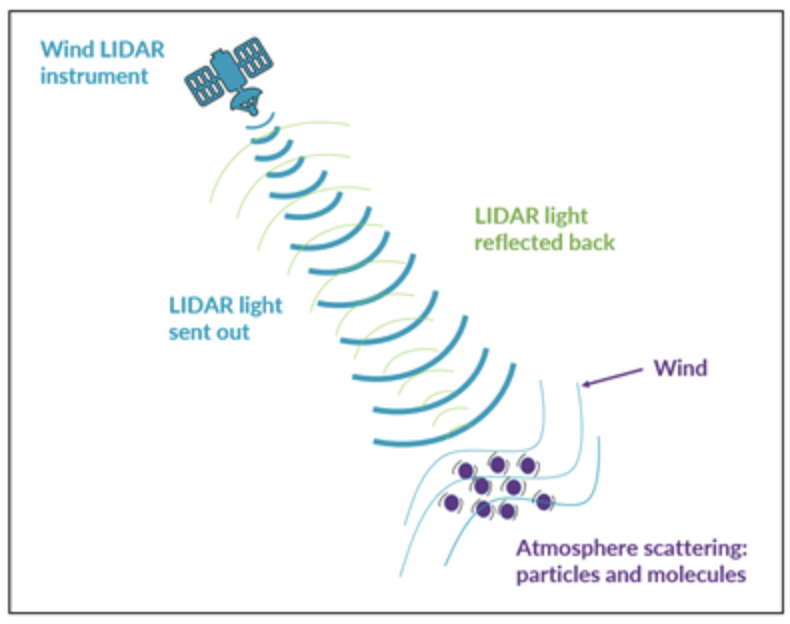

In [27]:
#Uploading data-don't need to worry about how to write any of this code yet!
lidar_winds=pd.read_csv('lidar_winds_short.csv')
time=np.asarray(lidar_winds['timestamp'])
wind18m=np.asarray(lidar_winds['wspd18m'])
wind_array=np.array([time,wind18m])

The lidar data we will use here is called wind_array! It is a numpy array with two columns: time and wind speed. Let's investigate what this data looks like!

In [18]:
wind_array.shape

(2, 84396)

<font color ='blue'> What does this tell us about our array?

2 columns, 84,396 rows of data 

In [20]:
wind_array[:,0:4]

array([['08-12-2019 00:00', '08-12-2019 00:10', '08-12-2019 00:20',
        '08-12-2019 00:30'],
       [7.2923, 7.8613, 7.7594, 7.4891]], dtype=object)

<font color ='blue'> What does this tell us about our array?

This shows us the first 3 rows of data. First column is data+time, data is every 10 minutes. Second column is our wind values. 

In [21]:
print(wind_array[0,0])
print(wind_array[0,-1])

08-12-2019 00:00
03-21-2021 23:50


<font color ='blue'> What does this tell us about our array?

First and last data+time of data. 

In [22]:
print(np.amin(wind_array[1]))
print(np.amax(wind_array[1]))

0.5279
18.8254


<font color ='blue'> What does this tell us about our array?

maximum and minimum wind speeds in all our data. 

<h2> We want to look at the hourly data only from June 2020 

<h2><font color=blue> In the following code, after every # symbol, explain in your own words what the next line(s) of code are doing
    <br/> 5-10 mins on their own
    <br/> 10 mins break out room


In [28]:

#Label Num_dates as the number of dates we have in our data 
Num_dates=len(wind_array[0])

#
wind_06_2020=np.array([0,0])

#
for i in range(len(wind_array[0])):
    #
    time=wind_array[0,i]
    wdsp=wind_array[1,i]
    
    #
    year=time[6:10]
    month=time[0:2]
    
    #
    if year=='2020' and month=='06':
        #
        newdata=[time,wdsp]
        #
        wind_06_2020=np.vstack((wind_06_2020,newdata))

#        
wind_06_2020=np.delete(wind_06_2020,0,0)
        

    
#
hourly_wind_06_2020=np.array([0,0])

    
#
for j in range(int(len(wind_06_2020[:,0])/6)):
    #
    k=j*6
    #
    day_hour=wind_06_2020[k,0][3:5]+','+wind_06_2020[k,0][11:13]
    
    #
    hourly_wdsp=np.mean([wind_array[1,k],wind_array[1,k+1],wind_array[1,k+2],wind_array[1,k+3],wind_array[1,k+4],wind_array[1,k+5]])

    #
    newhourlydata=[day_hour,hourly_wdsp]
    
    #
    hourly_wind_06_2020=np.vstack((hourly_wind_06_2020,newhourlydata))
#
hourly_wind_06_2020=np.delete(hourly_wind_06_2020,0,0)    
    
    

<h2><font color=blue> Run this loop to get the resulting data hourly_wind_06_2020. <br /> Explain in words what the resulting hourly_wind_06_2020 is. 

Hourly data for June 2020.

<font color=red> Plot wind_06_2020 with time on the x axis and 18m wind speed on the y axis.

<font color=red> Copy and paste the code above edit this loop to make it faster or use fewer lines

numpy.str_

<h2> 4. More plotting using Matplotlib!

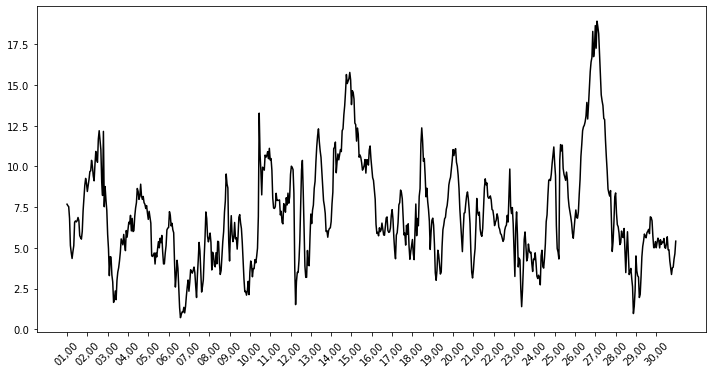

In [34]:
#Create the figure
fig=plt.figure(figsize=(12,6))

#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
time=hourly_wind_06_2020[:,0]
wind=hourly_wind_06_2020[:,1].astype('float64')

plt.plot(time, wind,color='black')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)


plt.show()

<font color='blue'> <h2> The code for the above image is copy and pasted below. 

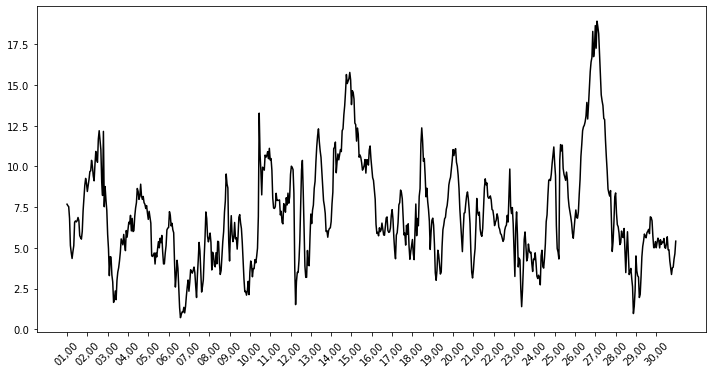

In [35]:
#Create the figure
fig=plt.figure(figsize=(12,6))
#add one subplot to figure
ax= fig.add_subplot(1, 1, 1)

#name and plot time on the x axis, wind on the y
time=hourly_wind_06_2020[:,0]
wind=hourly_wind_06_2020[:,1].astype('float64')

plt.plot(time, wind,color='black')

#Only label every 24 ticks (daily), otherwise it gets too crowded
ax.set_xticks(ax.get_xticks()[::24])
#rotate tick labels for better spacing/viewing
ax.tick_params(axis='x', rotation=45)


plt.show()

<font color='blue'> <h2> Edit/add to the code above so that the output matches the image below it.
    <br/> Hint: googling Matplotlib + whatever you want to do is a great tool for this challenge
    <br/>You can also look at official documentation: https://matplotlib.org/
    <br/> <font color='red'> add a trend line or anything else you think may improve this graph!

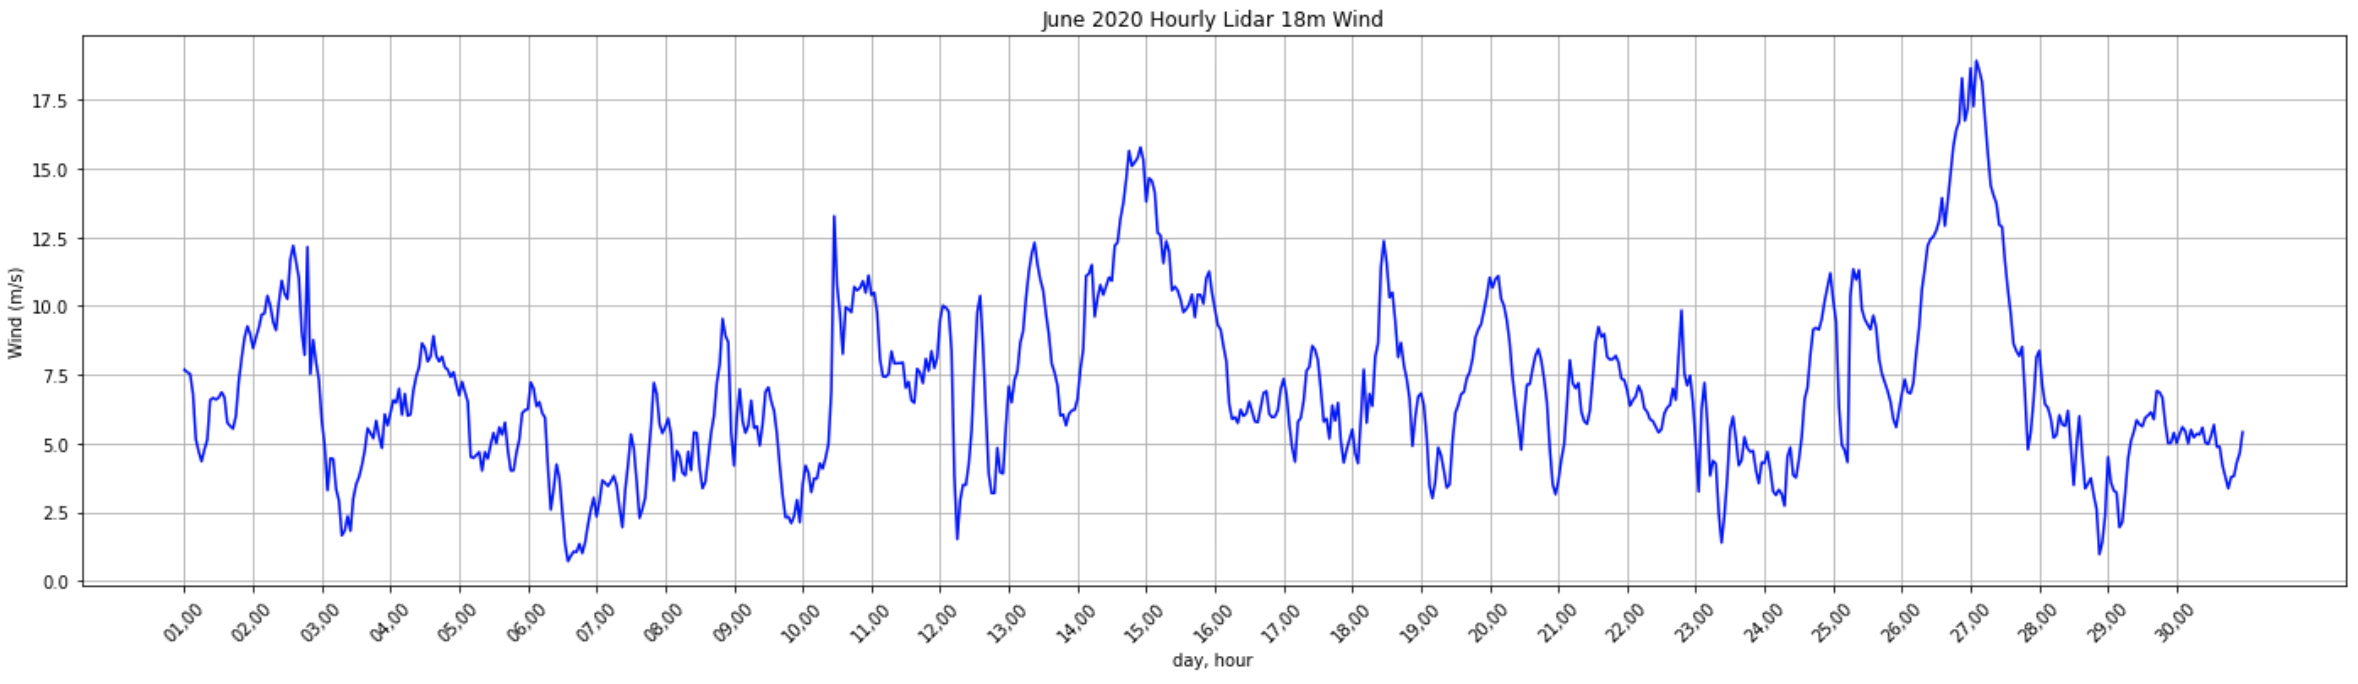